<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

//anaconda/envs/dsi/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_filepath = '/Users/paulmartin/Desktop/DSI-SF-2-GitPaulM/datasets/state_sat_scores/sat_scores.csv'

In [3]:
# Put data in dictionary format using CSV module

#First open file and read (CSV)

with open(sat_filepath, 'r') as f:
    reader = csv.reader(f)
    satdata = [row for row in reader]
    
# Let's change numerics to float

satfloat = []
satfloat = [[v1,v2,v3,v4] if v1 == 'State' else [v1,float(v2),float(v3),float(v4)]for v1,v2,v3,v4 in satdata]

header = satfloat[0]
data = satfloat[1:]

#create the sat dictionary

satdict = {}
for index, each_lbl in enumerate(header):
    satdict[each_lbl] = [] 
    for each_dta in data:
        satdict[each_lbl].append(each_dta[index])
        



### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
#1.2a Make a pandas DataFrame Object with the sat dictionary

pandadf1 = pd.DataFrame(satdict)
pandadf1


,Math,Rate,State,Verbal
0,510.0,82.0,CT,509.0
1,513.0,81.0,NJ,499.0
2,515.0,79.0,MA,511.0
3,505.0,77.0,NY,495.0
4,516.0,72.0,NH,520.0
5,499.0,71.0,RI,501.0
6,499.0,71.0,PA,500.0
7,506.0,69.0,VT,511.0
8,500.0,69.0,ME,506.0
9,501.0,68.0,VA,510.0


In [5]:
#1.2b Make a pandas DataFrame Object with the pandas readcsv function

preadcsvdf = pd.read_csv(sat_filepath)

preadcsvdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
preadcsvdf.head(10)


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [7]:
#Inference:  response rate and math appear to be uncorrelated

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
Satdatadict = {}
header = satfloat[0:1][0]
for item in header:
    Satdatadict[item]= {}
    
Satdatadict['Shape'] = 'Rows:  Data by State, Columns: Scores by Category'    
    
Satdatadict['State']['Description'] = 'Test Location'
Satdatadict['State']['Column Name'] ='State' 
Satdatadict['State']['Type'] = 'string'
Satdatadict['Rate']['Description'] = 'Participation rate by state'
Satdatadict['Rate']['Column Name'] ='Rate' 
Satdatadict['Rate']['Type'] = 'float'
Satdatadict['Math']['Description'] = 'Math SAT scores by state'
Satdatadict['Math']['Column Name'] ='Math' 
Satdatadict['Math']['Type'] = 'float'
Satdatadict['Verbal']['Description'] = 'Verbal SAT scores by state'
Satdatadict['Verbal']['Column Name'] ='Verbal' 
Satdatadict['Verbal']['Type'] = 'float'


Satdatadict['Shape'] = 'Rows:  Data by State, Columns: Scores by Category'
print Satdatadict


{'Math': {'Type': 'float', 'Column Name': 'Math', 'Description': 'Math SAT scores by state'}, 'Shape': 'Rows:  Data by State, Columns: Scores by Category', 'State': {'Type': 'string', 'Column Name': 'State', 'Description': 'Test Location'}, 'Rate': {'Type': 'float', 'Column Name': 'Rate', 'Description': 'Participation rate by state'}, 'Verbal': {'Type': 'float', 'Column Name': 'Verbal', 'Description': 'Verbal SAT scores by state'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [9]:
#m = satdict['Math']

v = preadcsvdf['Verbal']
m = preadcsvdf['Math']
r = preadcsvdf['Rate']



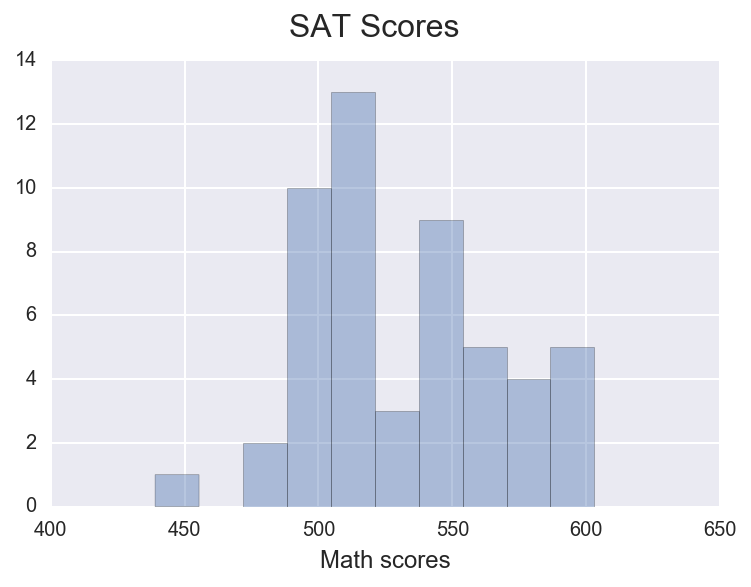

In [40]:
%matplotlib inline
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(color_codes=True)


#np.random.seed(sum(map(ord, "distributions")))
#x = np.random.normal(size=100)

sns.distplot(m, kde=False, bins=10);
plt.xlabel('Math scores', fontsize=12)



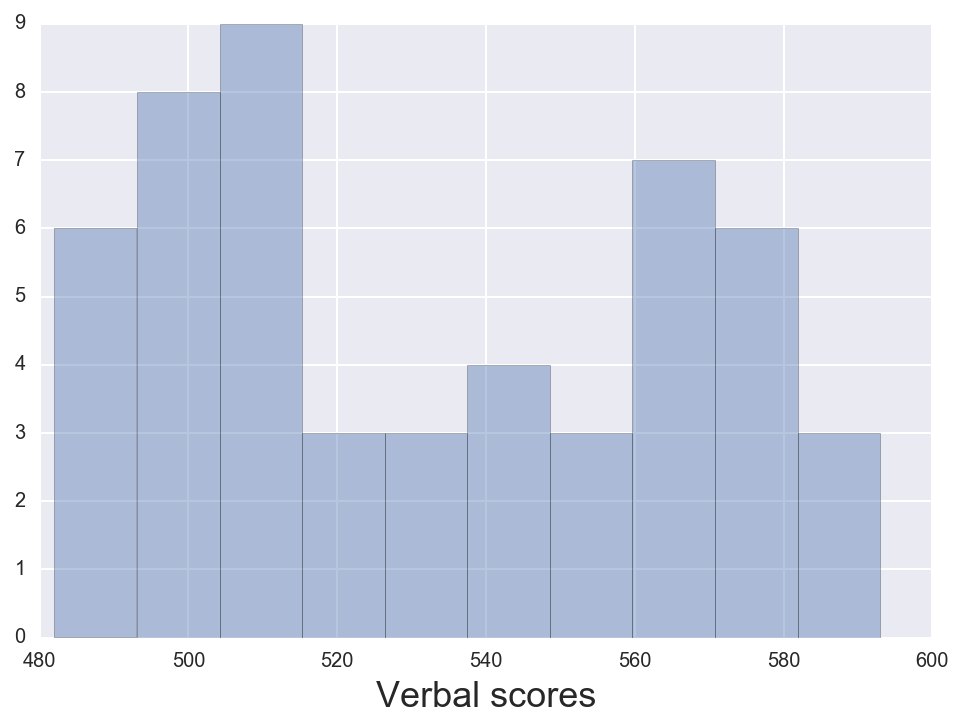

In [35]:
sns.distplot(v, kde=False, bins=10);
plt.xlabel('Verbal scores', fontsize=18)
 

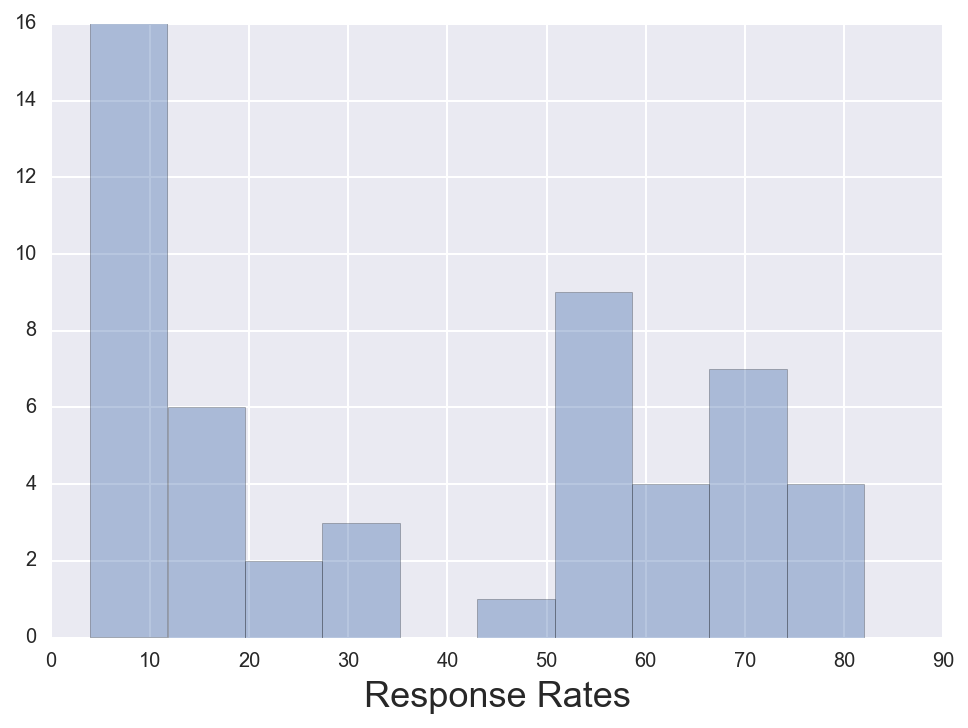

In [12]:
sns.distplot(r, kde=False, bins=10);
plt.xlabel('Response Rates', fontsize=18)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

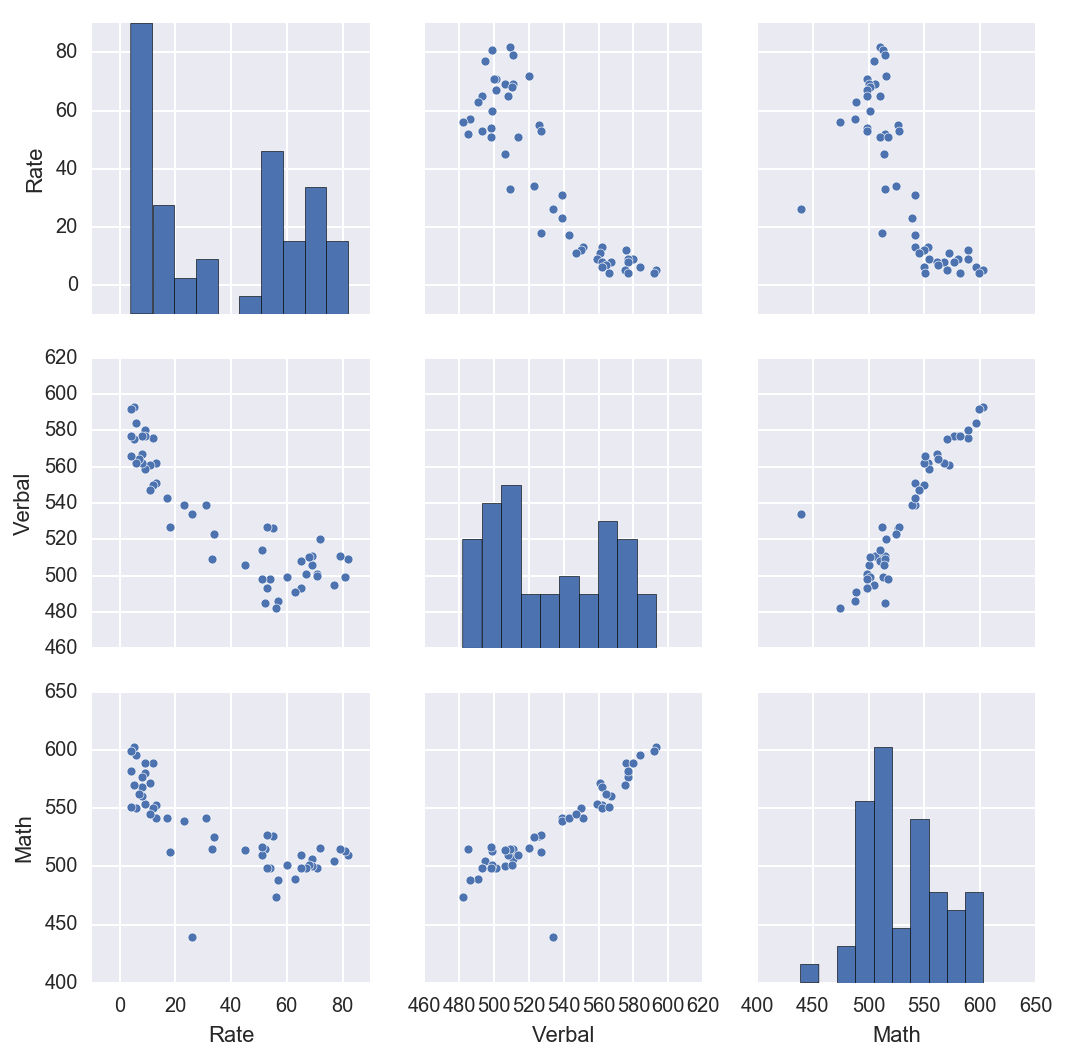

In [13]:
sns.pairplot(preadcsvdf);
#plt.xlabel('Rate', fontsize=18)

In [14]:
#For convenience going forward
SAT = preadcsvdf

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

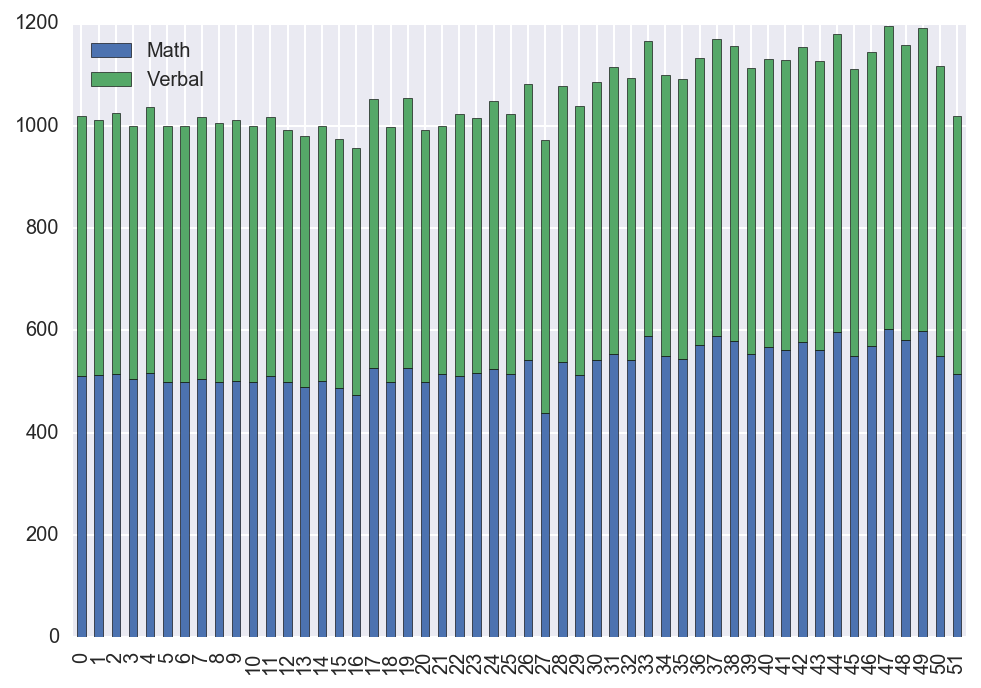

In [15]:
#SAT.plot(x='Math', y='Verbal')
SAT[['Math','Verbal']].plot.bar(stacked=True);
#df2.plot.bar(stacked=True);

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

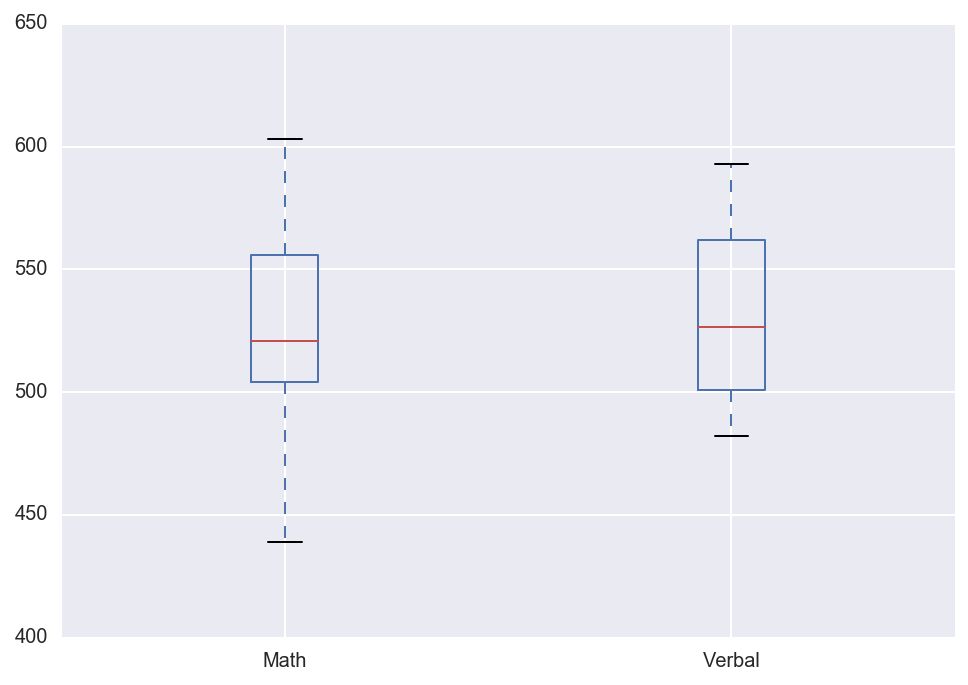

In [16]:
fig = plt.figure(figsize=(12, 7))
SAT[['Math','Verbal']].plot.box()


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


//anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/ops.py:995: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 52
  yrav = yrav[mask]


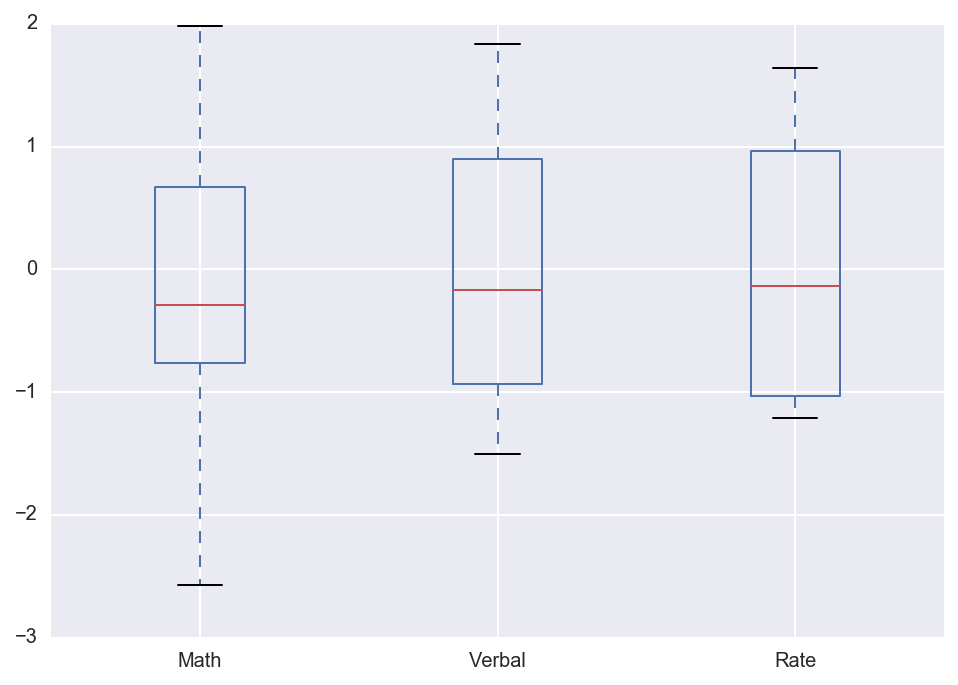

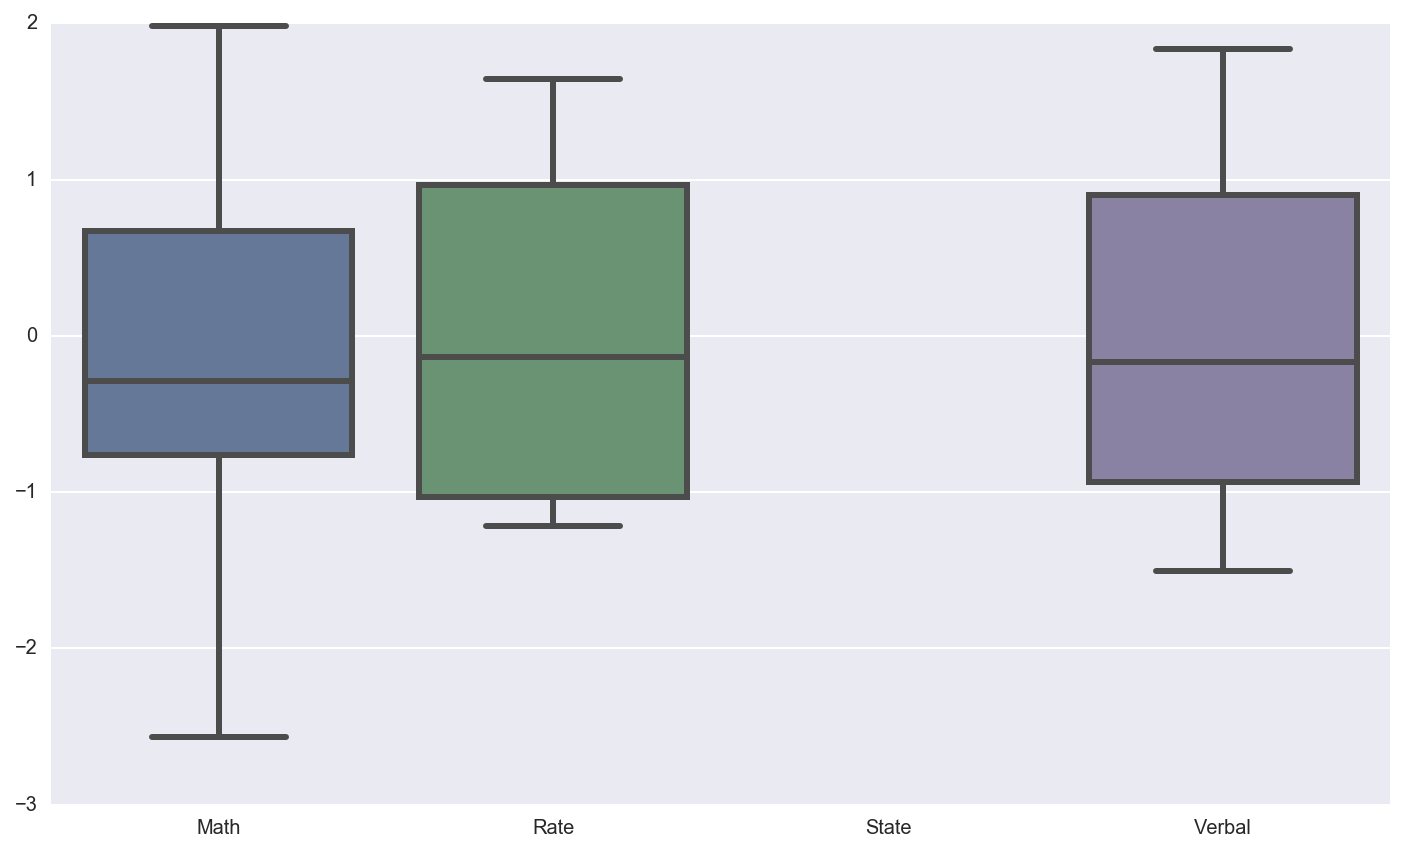

In [17]:

# Normalize / Standardize

SAT_norm = (SAT - SAT.mean())/SAT.std()

SAT_norm[['Math','Verbal','Rate']].plot.box()
plt.show()


fig = plt.figure(figsize=(12, 7))
ax = fig.gca()

ax = sns.boxplot(data=SAT_norm, orient='v', fliersize=4, 
                 linewidth=3, notch=False, saturation=0.5, ax=ax)
plt.show()



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
vbmean = SAT['Verbal'].mean()
print "Mean: ", vbmean
filter = SAT['Verbal'] > vbmean
y = SAT[filter]
print y.describe()
y[['State']]


Mean:  532.019230769
           Rate      Verbal       Math
count  24.00000   24.000000   24.00000
mean   10.87500  564.041667  560.62500
std     7.03601   16.624966   32.61743
min     4.00000  534.000000  439.00000
25%     6.00000  550.750000  548.75000
50%     9.00000  563.000000  561.50000
75%    12.25000  577.000000  580.50000
max    31.00000  593.000000  603.00000


,State
26,CO
27,OH
28,MT
30,ID
31,TN
32,NM
33,IL
34,KY
35,WY
36,MI


Inference Mean > Median Skew to the right

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [19]:
vbmedian = np.median(SAT['Verbal'])
print "Median: ", vbmedian
filter = SAT['Verbal'] > vbmedian
y = SAT[filter]
print y.describe()
y['State']


Median:  526.5
            Rate      Verbal        Math
count  26.000000   26.000000   26.000000
mean   12.769231  561.192308  557.461538
std    10.715625   18.857400   33.289315
min     4.000000  527.000000  439.000000
25%     6.250000  547.750000  542.750000
50%     9.000000  562.000000  557.500000
75%    13.000000  576.750000  579.250000
max    53.000000  593.000000  603.000000


19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

Inference Mean > Median Skew to the right:  Stronger states pulling mean to right

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [20]:
SAT['Verbal - Math'] = SAT['Verbal']-SAT['Math']
print type(SAT)
SAT

<class 'pandas.core.frame.DataFrame'>


,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [21]:
SATsorted = SAT.sort_values('Verbal - Math',ascending=False)
TopVlessM = SATsorted[0:10]
SATsorted = SAT.sort_values('Verbal - Math',ascending=True)
BottomVlessM = SATsorted[0:10]
print "\nTop 3 States Verbal Exceeding Math\n"
print TopVlessM.head(3)
print "\n Bottom 3 States Verbal Below Math\n"
print BottomVlessM.head(3)



Top 3 States Verbal Exceeding Math

   State  Rate  Verbal  Math  Verbal - Math
27    OH    26     534   439             95
50    MS     4     566   551             15
29    WV    18     527   512             15

 Bottom 3 States Verbal Below Math

   State  Rate  Verbal  Math  Verbal - Math
21    HI    52     485   515            -30
23    CA    51     498   517            -19
1     NJ    81     499   513            -14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [22]:
SATb = SAT[['Rate','Verbal','Math']]
SATb.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


In [23]:
#correlation is a measure of how variables are dance partners.  Do they move together or not.  The closer to +- 1 the more linearly relatead they are


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [24]:
SAT.describe()

# count = row cont
# mean = average
# std = standard deviation
# min = min value
# max = max value
# 25/50/75 -- percentiles
# max  max value

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

1 Covariance Matrix is the square of the correlation matrix.
2 Square it
3 Industy standard, in units not units square, and probably most importantly it has a sign indicating a positive or negative correlation

In [25]:
SATb = SAT[['Rate','Verbal','Math']]
SATb.cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


In [26]:
#1) not a number between (-1,1) , diaganol is the variance, difficult to compare given the units,
#2cor(x,y)=cov(x,y)/(std(x)*std(y))
#3 always between -1 and 1 and you can thereby compare

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [27]:
drug_data_filepath = '/Users/paulmartin/Desktop/DSI-SF-2-GitPaulM/datasets/drug_use_by_age/drug-use-by-age.csv'
#paulmartin/Desktop/DSI-SF-2-GitPaulM

In [28]:
drugdf = pd.read_csv(drug_data_filepath)
drugdf.info()

#No data missing, but existence of objects might require cleanup,  Will focus more on the data descrptions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [29]:
drugdf = pd.read_csv(drug_data_filepath)
print drugdf.shape
drugdf

(17, 28)


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [30]:
drugdf.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [31]:
#Is sedative use greater in the 65+ population compared to 30 year olds
#2 The deliverables fo this test will be what was learned from the test, teh result, associated significance and conclusions


In [63]:
#Ignore

# #Lets look at thr dat over time

# sed = drugdf['sedative-use']
# xlabels = drugdf['age']

# fig = plt.figure(figsize=(20, 12))
# ax = fig.gca()

# sns.distplot(sed, kde=False, bins=10);
# #plt.xlabel('Age groups', fontsize=12)
# plt.suptitle('Sedative use',fontsize=20) 
# plt.xticks(sed, xlabels)


In [ ]:
#label challenge on graph but sedative use appears to be the lowest.   SO let's look at this another way

In [59]:
drug_sed = drugdf[['age','sedative-use']].sort_values('sedative-use',ascending = "False")
print drug_sed

      age  sedative-use
16    65+           0.0
1      13           0.1
11  24-25           0.2
10  22-23           0.2
15  50-64           0.2
0      12           0.2
4      16           0.2
2      14           0.2
7      19           0.3
9      21           0.3
14  35-49           0.3
6      18           0.4
3      15           0.4
12  26-29           0.4
13  30-34           0.4
5      17           0.5
8      20           0.5


In [ ]:
# conclusion:  The data indicates that sedative_use is lowest amongst all data categories including 
#the 30-34 population.    The hypothersis is rejected.  



<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

In [ ]:
#See above

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 



In [32]:
#1) Sum (X-E(X))(Y-E(Y))/n = population covariance  
#2) cor(x,y)=cov(x,y)/(std(x)*std(y))
#3) -1 <= cor <+ 1 and cor is unitless

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

In [ ]:

# Grow opportunity matrix / dot  

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [127]:
Rateonly = SAT['Rate'].sort_values()
print "Describe with outliers"
Rateonly.describe()

#2) Doesn't appear to be outliers, given data falls within 2 standard deviations of the mean.  Given the skew let's say they are and 
# remove all outside the 5-95 percentiles

    

Describe with outliers


count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

In [130]:
#Manage outliers

outliers = [x for x in Rateonly if ((x <= np.percentile(Rateonly,5)) or (x >= np.percentile(Rateonly,95)))]
print "Outliers: ",outliers

Ratesans = [x for x in Rateonly if ((x > np.percentile(Rateonly,5)) and (x < np.percentile(Rateonly,95)))]
dfRatesans = pd.DataFrame(Ratesans,columns=["Rate"])
print "Describe without outliers"

dfRatesans.describe()

#5 less skewed mean closer to mefian, reduced range

Outliers:  [4, 4, 4, 79, 81, 82]
Describe without outliers


,Rate
count,46.000000
mean,36.478261
std,25.390934
min,5.000000
25%,11.000000
50%,33.500000
75%,59.250000
max,77.000000


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [133]:
stats.spearmanr(SAT[['Verbal','Math']])

SpearmanrResult(correlation=0.90520488479402839, pvalue=3.2352319597775181e-20)

In [ ]:
#Spearman is slightly higher
# Two data series are ranked and the Pearson correlation coefficient is calculated on the ranked series

### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.